#### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 1: I Want to Believe!

### 100 points [5% of your final grade]
### Due: Sunday, September 6 by 11:59pm

*Goals of this homework:* The objective of this homework is to collect data from the web, clean it, and then make some observations based on exploratory data analysis.

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw1.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw1.ipynb`. Submit this notebook via Canvas (looking for homework 1 under the assignment section. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Wednesday, September 9 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* Collaboration Declaration 1
* Collaboration Declaration 2
* ...

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## (25 points) Part 1: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going to focus only on UFO sightings in Alaska, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlAK.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. In particular, we're going to use the Python libraries **[requests](https://requests.readthedocs.io/en/master/)** and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [44]:
import requests as rq
from bs4 import BeautifulSoup
import csv
# you should use requests to get the webpage, then extract
headers = []
row = []
counter = 0
website = rq.get('http://www.nuforc.org/webreports/ndxlAK.html')
Psite = BeautifulSoup(website.text, 'html.parser')
Outfile = open('ufo_alaska.csv','w',encoding='utf-8')
csvFile = csv.writer(Outfile)
hdList = Psite.find_all('th')

for i in hdList:
    headers.append(i.get_text())
csvFile.writerow(headers)
    
tdList = Psite.find_all('td')

for j in tdList:
    row.append(j.get_text())
    counter += 1
    if(counter == 7):
        csvFile.writerow(row)
        counter = 0
        row.clear()
Outfile.close()
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

Once you have your local csv file, you should read it in and then issue the .head() command.

In [45]:
import csv
import pandas
Data = pandas.read_csv('ufo_alaska.csv')
print(Data.head())


     Date / Time              City State     Shape       Duration  \
0  8/22/20 01:00      Anchorage Ak    AK    Circle       1 minute   
1  8/21/20 10:15         Anchorage    AK      Disk  10-12 minutes   
2  8/20/20 04:00         Anchorage    AK  Triangle     45 minonds   
3  8/17/20 00:30            Bethel    AK  Triangle    3-4 minutes   
4   4/9/20 10:15  54.690   163.771    AK  Changing      8 minutes   

                                             Summary   Posted  
0  One craft seen much lower and moving slower th...  8/27/20  
1  Elmendorf Airbase launched 3 F-22 jets with af...  8/27/20  
2  Spinning pyramid with red, green, blue lights,...  8/27/20  
3                       Black Triangle UFO in Alaska  8/20/20  
4  REPORT FROM ((name deleted))    5-29-20 DATE O...  6/25/20  


## (45 points) Part 2: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Then plot a boxplot of the duration (in seconds).

In [3]:
# your code here 
import pandas as pd
CHECKER = 0
P1 = []
TinSec = []
T = []
data = pd.read_csv('ufo_alaska.csv')
duration = data["Duration"]
# filter out invalid durations
Checks = 0
PickyL = duration.str.contains("^\d+\s(seconds*|minutes*|hours*|days*)$")
for a in PickyL:
    if a:
        if(isinstance(duration[CHECKER],str)):
            P1.append(data.iloc[CHECKER])
            T.append(CHECKER)
    CHECKER +=  1
PickyT1 = pd.DataFrame(P1)
PickyFixed = PickyT1.rename(columns={'Duration':'Duration (in seconds)'})
Times = PickyFixed['Duration (in seconds)']
d = 0
# convert all valid durations to seconds
for b in Times:
    splitter = b.split(" ")
    num = int(splitter[0])
    title = splitter[1]
    if(title.find("minute") != -1):
        conv = num*60
    elif(title.find("hour") != -1):
        conv = num*3600
    elif(title.find("day") != -1):
        conv = num*86400
    else:
        conv = num
    if(title == "second"):
        conv2 = conv
    else:
        conv2 = conv
    TinSec.append(conv2)
for c in T:
    PickyFixed.at[c,'Duration (in seconds)'] = TinSec[d]
    d += 1
print(PickyFixed.head)

<bound method NDFrame.head of        Date / Time                 City State      Shape  \
0    8/22/20 01:00         Anchorage Ak    AK     Circle   
4     4/9/20 10:15     54.690   163.771    AK   Changing   
6    3/30/20 01:18       Point Makenzie    AK      Light   
7    3/23/20 12:00               Juneau    AK   Changing   
8    3/12/20 20:57          Eagle River    AK     Circle   
..             ...                  ...   ...        ...   
428  11/1/69 19:30            Fairbanks    AK  Formation   
429  6/30/68 23:00            Anchorage    AK     Circle   
430  9/15/67 00:00  Cook Inlet (at sea)    AK      Light   
435   7/1/49 11:00            Fairbanks    AK       Disk   
436  4/30/43 23:00           Bering Sea    AK      Other   

    Duration (in seconds)                                            Summary  \
0                      60  One craft seen much lower and moving slower th...   
4                     480  REPORT FROM ((name deleted))    5-29-20 DATE O...   
6        

In [4]:

# total rows in original dataset
print(len(data.index))

# valid rows in your new 'validated' dataset
print(len(PickyT1.index))

438
263


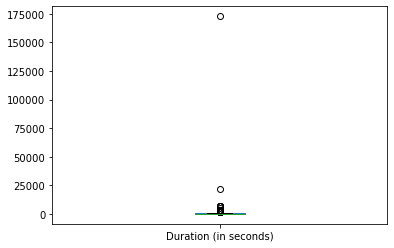

In [5]:
boxplot = PickyFixed.plot.box()

Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so make detailed notes of what decisions you are making and why.

In [95]:
import pandas as pd
CHECKER2 = 0
p1 = []
DurinSec = []
T = []
a = 0
b = 0
data = pd.read_csv('ufo_alaska.csv')
duration = data["Duration"]
# filter out invalid durations
Checks = 0
datsplit = []
#Generates normal data
PickyL2 = duration.str.contains("^(>|<)?\d+-?(\d+)?\s(seconds*|minutes*|hours*|days*)$")
for g in PickyL2:
    if g:
        if(isinstance(duration[CHECKER2],str)):
            p1.append(data.iloc[CHECKER2])
            T.append(CHECKER2)
    CHECKER2 +=  1
#Goes back and gets odd cases
newDat = pd.DataFrame(p1)
FixedDat = newDat.rename(columns={'Duration':'Duration (in seconds)'})
Messytimes = FixedDat['Duration (in seconds)']
checker = 0 
d = 0
# convert all valid durations to seconds
for b in Messytimes:
    splitter = b.split(" ")
    if '-' in b:
        avsplitter = splitter[0].split("-")
        num1 = int(avsplitter[0])
        num2 = int(avsplitter[1])
        num = num1+num2/2
    elif '>' in b:
        Gsplitter = splitter[0].split(">")
        num = int(Gsplitter[1])
    elif '<' in b:
        Lsplitter = splitter[0].split("<")
        num = int(Lsplitter[1])
    else:
        num = int(splitter[0])
    title = splitter[1]
    if "minute" in title:
        conv = num*60
    elif "hour" in title:
        conv = num*3600
    elif "day" in title:
        conv = num*86400
    else:
        conv = num
    DurinSec.append(conv)
for c in T:
    PickyFixed2.at[c,'Duration (in seconds)'] = DurinSec[d]
    d += 1

print(PickyFixed2.head)

<bound method NDFrame.head of        Date / Time                 City State      Shape  \
0    8/22/20 01:00         Anchorage Ak    AK     Circle   
1    8/21/20 10:15            Anchorage    AK       Disk   
3    8/17/20 00:30               Bethel    AK   Triangle   
4     4/9/20 10:15     54.690   163.771    AK   Changing   
6    3/30/20 01:18       Point Makenzie    AK      Light   
..             ...                  ...   ...        ...   
428  11/1/69 19:30            Fairbanks    AK  Formation   
429  6/30/68 23:00            Anchorage    AK     Circle   
430  9/15/67 00:00  Cook Inlet (at sea)    AK      Light   
435   7/1/49 11:00            Fairbanks    AK       Disk   
436  4/30/43 23:00           Bering Sea    AK      Other   

    Duration (in seconds)                                            Summary  \
0                      60  One craft seen much lower and moving slower th...   
1                     960  Elmendorf Airbase launched 3 F-22 jets with af...   
3        

C:\Users\olivi\AnacondaDS\envs\cs320\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [98]:
# total rows in original dataset
print(len(data.index))
# valid rows in your cleaned dataset
print(len(PickyFixed2.index))

438
317


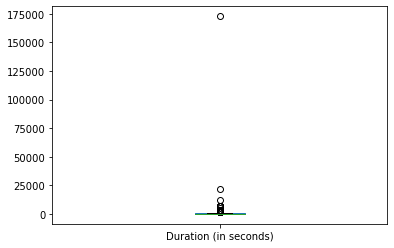

In [97]:
# draw a boxplot for your cleaned dataset
boxplot = PickyFixed2.plot.box()

Now, revisit your two boxplots -- for the initial "valid" dataset and then for your cleaned dataset. What do you observe? What differences does cleaning have? Would you imagine your downstream analyses would be affected by this cleaning step? Explain.

I observed that the data looks slightly more spread out for the cleaned data. By cleaning data it normalizes unclear data points while valid dataset completely eliminated those unclear data points. I think downstream analyses would be affected because the outlier may not be much of an outlier and having more data points will give a better visual on trends in the data (skewed or not).

## (30 points) Part 3: Aliens, aliens everywhere.
Finally, let's begin our initial analysis of the cleaned UFO dataset. In this section, we're going to do some plotting with matplotlib and draw some initial conclusions that may guide our future study of this UFO dataset. 

Which **shapes** are most observed?

<AxesSubplot:>

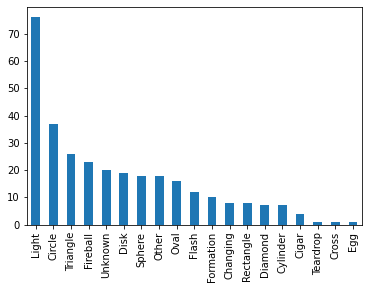

In [142]:
import matplotlib as mp
Shapes = PickyFixed2['Shape']
Shapes.value_counts().plot(kind='bar')

Do different UFO shapes have different durations?

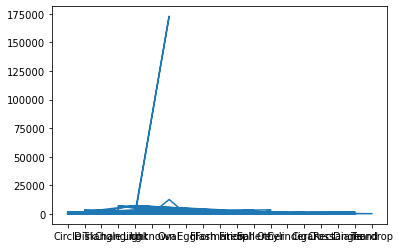

In [171]:
import matplotlib.pyplot as plt
# create a plot of shapes/durations
FixS = []
FixD = []
counter = 0
for a in PickyFixed2['Shape']:
    if type(a) == str:
        FixS.append(a)
        FixD.append(PickyFixed2.iloc[counter])
    counter += 1
Dur = pd.DataFrame(FixD)

#Shapes.value_counts().plot(kind='bar')
plt.plot(FixS,Dur['Duration (in seconds)'])
plt.show()

# Are there more UFO sightings in recent years than in the past?

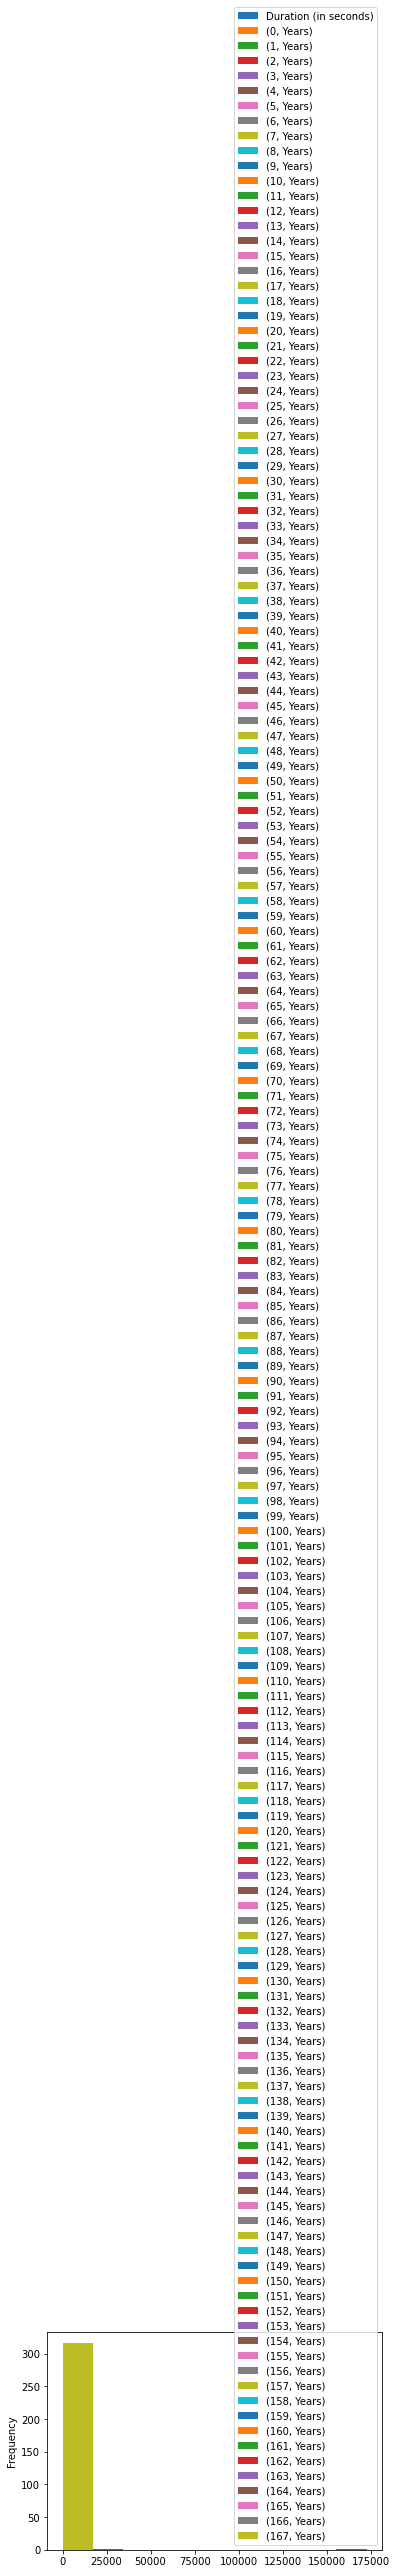

In [151]:
# you might want to bucket the sightings into years
FixedDat = PickyFixed2.rename(columns={'Date / Time':'Years'})
yer = FixedDat['Years']
ToYears = []
for yr in yer:
    date = yr.split(" ")
    fixY = date[0]
    y = int(fixY[-2:])
    ToYears.append(y)
i = 0
for r in PickyFixed2:
    PickyFixed2[i,'Years'] = ToYears[i]
    i += 1
histo = PickyFixed2.plot.hist(by='Years',bins=10)

Based on your observations and analyses, what are some important next steps we should take?

Next steps would be to see if time of day play a factor into the shapes and durations (adding more variables to see if they are related) and become more specific about the dates (ex: what months were there the most sightings. what type of shape, etc.).

## (10 points) BONUS

Finally, we'll set aside a few bonus points for any **amazing** or **inspiring** analysis you would like to do over our UFO data in addition to what we have covered so far. This bonus is designed to be a very heavy workload for very light reward. So focus on finishing the first three parts above before even considering this part. We will be extremely tough on grading this part ... so slapping together a quick figure will most likely result in 0 bonus. Good luck!

In [ ]:
## your code here